In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt 

In [2]:
(x_train, y_train),(x_test,y_test)=keras.datasets.cifar10.load_data()
x_train , x_test = x_train/255.0 , x_test/255.0

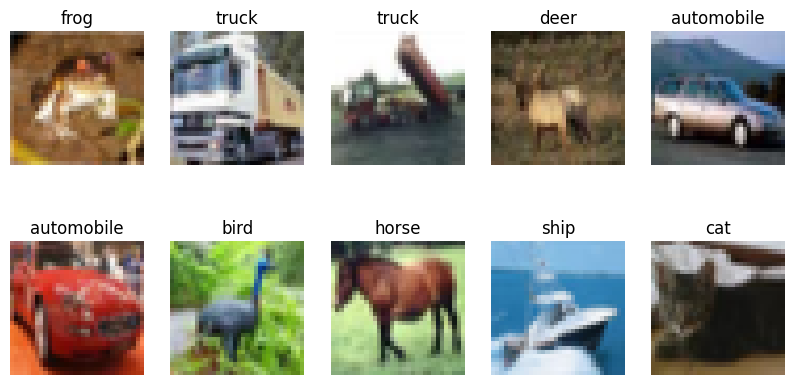

In [16]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()



In [3]:
# architecture
model = keras.Sequential ([
    layers.Conv2D(32 ,(3,3), activation='relu', input_shape=(32,32,3)),
                  layers.MaxPooling2D ((2,2)),
                  layers.Flatten(),
                  layers.Dense(64, activation='relu'),
                  layers.Dense(10, activation = 'softmax')
                  ])

C:\Users\rp332\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
#training the model

model.compile(optimizer ='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history=model.fit(x_train,y_train, epochs =5, validation_data=(x_test,y_test))

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 37ms/step - accuracy: 0.3969 - loss: 1.6697 - val_accuracy: 0.5639 - val_loss: 1.2426
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.5755 - loss: 1.1985 - val_accuracy: 0.5853 - val_loss: 1.1789
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.6184 - loss: 1.0890 - val_accuracy: 0.6139 - val_loss: 1.1095
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 32ms/step - accuracy: 0.6475 - loss: 0.9986 - val_accuracy: 0.5981 - val_loss: 1.1681
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.6691 - loss: 0.9434 - val_accuracy: 0.6176 - val_loss: 1.1071


In [5]:
# accuracy 
test_loss,test_acc=model.evaluate(x_test,y_test)
print ("test_accuracy:" , test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6235 - loss: 1.0908
test_accuracy: 0.6176000237464905


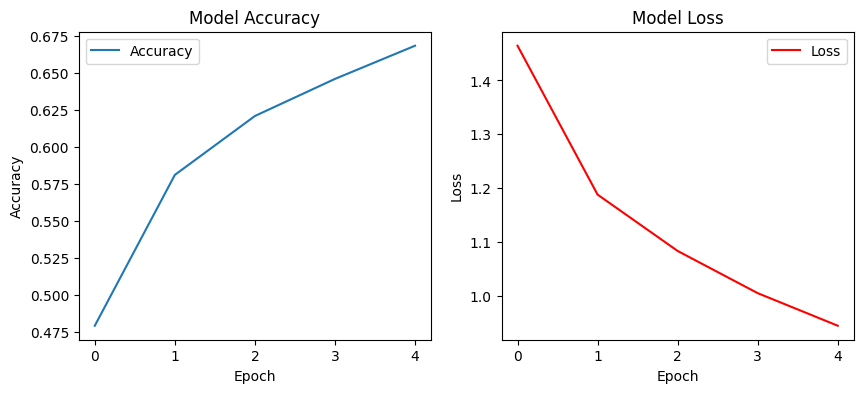

In [7]:
# Plot training accuracy and loss
plt.figure(figsize=(10,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Loss', color='red')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
Predicted Label: 3


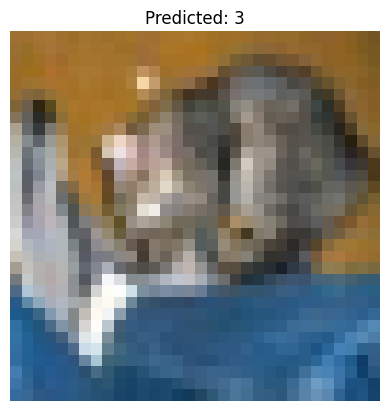

In [17]:
import numpy as np
# Take one test sample and predict
sample = x_test[0].reshape(1, 32, 32, 3)
pred = model.predict(sample)
predicted_class = np.argmax(pred)

print("Predicted Label:", predicted_class)
plt.imshow(x_test[0])
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()
